Read all the data file in python Pandas DataFrame.


In [1]:
# import libraries
import re
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

In [ ]:
import pandas as pd

# Read the CSV file in a Pandas DataFrame
df = pd.read_csv('image_caption.txt', sep=',')
df

Perform the necessary pre-processing task (e.g., punctuation, numbers, stop
word removal, etc.)

In [ ]:
# Call function in number 2
# train
def preprocess_txt(train_data):
    # Convert to lowercase
    train_data = [i.lower() for i in train_data]

    # Remove numbers
    train_data = [re.sub(r'\d+', '', data) for data in train_data]

    # Punctuation Removal
    string.punctuation
    train_data = ["".join([i for i in tok if i not in string.punctuation]) for tok in train_data]

    # Tokenization
    tokens = [word_tokenize(wd) for wd in train_data]

    # Stop Word Removal
    stop_words = nltk.corpus.stopwords.words('english')
    tokens = [[token for token in stp if token not in stop_words] for stp in tokens]

    # Perform Stemming and Lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    stemmed_tokens = [[stemmer.stem(token) for token in orieja]for orieja in tokens]
    lemmatized_tokens = [[lemmatizer.lemmatize(token) for token in bulaba] for bulaba in tokens]
    preprocessed_txt = [' ' .join(lem) for lem in lemmatized_tokens]
    return preprocessed_txt

In [ ]:
import numpy as np

In [ ]:
# ID= preprocess_txt(df.ID)
caption = df.caption.values
cation= preprocess_txt(caption)

# caption=caption.reshape(-1, 1)

In [ ]:
# cation = np.array(cation).shape

Create Term-Document Matrix with TF-IDF weighting

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the TfidfTransformer object
tfidf_vect = TfidfVectorizer()
# Fit and transform the preprocessed text data to create a term-document matrix
count_matrix = tfidf_vect.fit_transform(cation)


Based on the following query:
 angiographic image show normal coronary artery
search the 10 top ranked image ids (also try to display the associated images
in the notebook) by using Cosine Similarity measure to find the similarity
between query and documents.

In [ ]:
word = ['angiographic image show normal coronary artery']
word_mat = tfidf_vect.transform(word)

from sklearn.metrics.pairwise import cosine_similarity

cosine_similarities = cosine_similarity(word_mat, count_matrix).flatten()

related_docs_indices = cosine_similarities.argsort()[:-11:-1]

sim_value = cosine_similarities[related_docs_indices]

In [ ]:
tp_rnk_images=[]
for i in related_docs_indices:
  tp_rnk_images.append(df['ID'][i])

In [ ]:
tp_rnk_images

['ImageCLEFmedCaption_2022_train_000019',
 'ImageCLEFmedCaption_2022_train_000756',
 'ImageCLEFmedCaption_2022_train_000382',
 'ImageCLEFmedCaption_2022_train_000755',
 'ImageCLEFmedCaption_2022_train_000809',
 'ImageCLEFmedCaption_2022_train_000589',
 'ImageCLEFmedCaption_2022_train_000093',
 'ImageCLEFmedCaption_2022_train_000951',
 'ImageCLEFmedCaption_2022_train_000882',
 'ImageCLEFmedCaption_2022_train_000065']

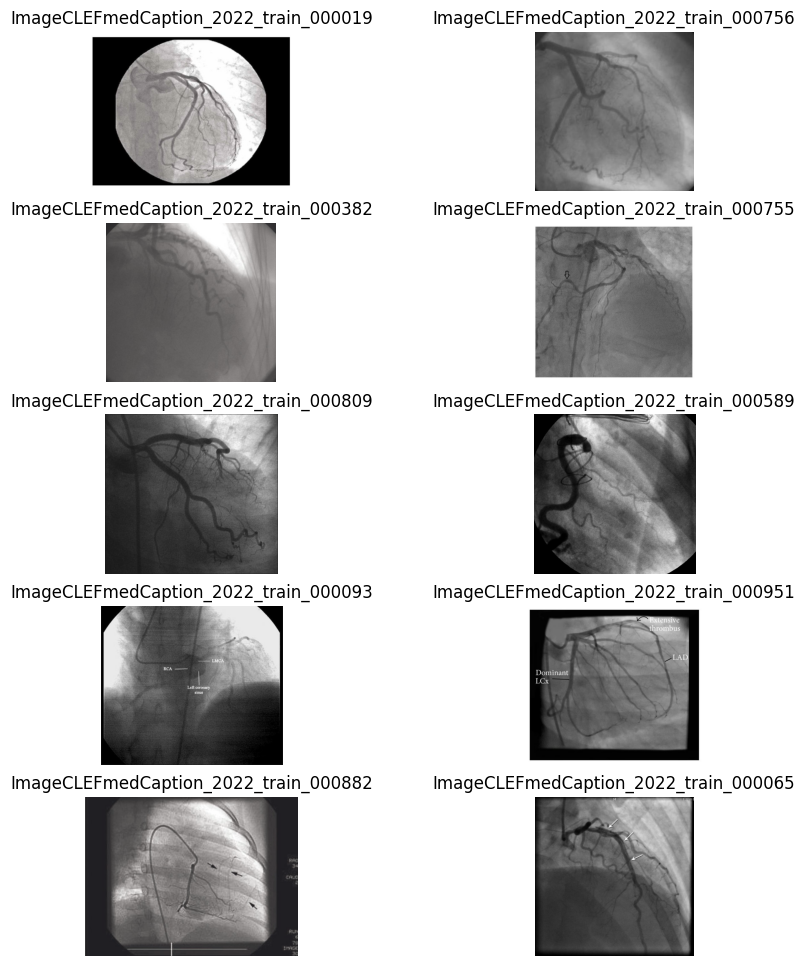

In [ ]:
import cv2
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/images/"

# Create a figure and subplots
fig, axs = plt.subplots(5, 2, figsize=(10, 12))
axs = axs.flatten()

# Display images
for i, image in enumerate(tp_rnk_images):
    axs[i].imshow(cv2.imread(path + image + '.jpg'), cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(image)

# Display the plot
plt.show()
